In [1]:
!pip install statsmodels

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Input data
data = {
    'Commissions': [22, 13, 34, 39, 23, 47, 30, 38, 42, 33, 20, 14, 47, 39, 45, 30, 39, 37, 15, 34, 25, 28, 26, 43, 35],
    'Calls': [143, 136, 146, 142, 142, 146, 141, 139, 148, 138, 138, 138, 150, 149, 145, 149, 145, 153, 135, 146, 133, 132, 130, 155, 148],
    'MilesDriven': [2374, 2227, 2733, 3351, 2293, 3450, 3117, 3344, 2843, 2629, 2124, 2223, 3465, 3291, 3106, 2125, 2792, 3213, 2287, 2851, 2690, 2936, 2671, 2992, 2830]
}

df = pd.DataFrame(data)

# Create the interaction term between Calls and MilesDriven
df['Interaction'] = df['Calls'] * df['MilesDriven']

# Define dependent variable (y) and independent variables (x1, x2, and interaction term)
y = df['Commissions']
x = df[['Calls', 'MilesDriven', 'Interaction']]

# Add a constant (intercept) to the independent variables
x = sm.add_constant(x)

# Fit the multiple regression model with the interaction term
model = sm.OLS(y, x).fit()

# Print the summary of the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Commissions   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     41.39
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           5.38e-09
Time:                        01:57:57   Log-Likelihood:                -68.739
No. Observations:                  25   AIC:                             145.5
Df Residuals:                      21   BIC:                             150.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -421.6004    158.339     -2.663      

In [5]:
# Get the t-value for the interaction term
t_value_interaction = model.tvalues['Interaction']

# Print the t-value rounded to 2 decimal places
print(round(t_value_interaction, 2))

-2.04


In [6]:
# Get the p-value for the interaction term
p_value_interaction = model.pvalues['Interaction']

# Print the p-value
print(p_value_interaction)

0.05391846258288806


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = {
    'Family': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SqrFt': [2240, 2380, 3500, 3360, 3000, 2900, 4100, 2520, 4200, 2800],
    'Income': [60.8, 68.4, 104.5, 89.3, 72.2, 114, 125.4, 83.6, 133, 95],
    'Size': [2, 2, 3, 4, 4, 3, 6, 3, 5, 3],
    'Senior': [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    'Education': [4, 6, 7, 0, 2, 10, 6, 8, 2, 6]
}

df = pd.DataFrame(data)

In [8]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Added {best_feature} with p-value {best_pval:.3f}')

        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Removed {worst_feature} with p-value {worst_pval:.3f}')

        if not changed:
            break

    return included

X = df[['Size', 'Income']]
y = df['SqrFt']

selected_features = stepwise_selection(X, y)

print(f'The selected features are: {", ".join(selected_features)}')

final_model = sm.OLS(y, sm.add_constant(df[selected_features])).fit()
print(final_model.summary())

Added Size with p-value 0.001
The selected features are: Size
                            OLS Regression Results                            
Dep. Variable:                  SqrFt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     31.25
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           0.000516
Time:                        02:28:25   Log-Likelihood:                -70.944
No. Observations:                  10   AIC:                             145.9
Df Residuals:                       8   BIC:                             146.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

C:\Users\user\AppData\Local\Temp\ipykernel_15208\1936305107.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\user\AppData\Local\Temp\ipykernel_15208\1936305107.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
import pandas as pd
import numpy as np

data = {
    'Manufacturer': ['Sharp', 'Samsung', 'Samsung', 'Sony', 'Sharp', 'Samsung', 'Samsung', 'Sharp', 'Sharp', 'Sony', 'Sony', 'Samsung', 'Sharp', 'Sharp', 'Sharp', 'Samsung', 'Sharp', 'Samsung', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony'],
    'Screen (in inches)': [47, 32, 45, 38, 39, 52, 41, 38, 48, 51, 30, 43, 35, 43, 52, 43, 37, 47, 48, 38, 50, 34, 48],
    'Price ($)': [1102.00, 423.25, 1141.00, 754.75, 661.00, 1446.00, 995.25, 586.00, 1622.50, 1659.00, 481.50, 868.00, 609.00, 1062.00, 1604.00, 853.50, 530.25, 1159.00, 1609.00, 549.25, 1578.25, 427.50, 1470.00]
}

df = pd.DataFrame(data)

correlation_coefficient = np.corrcoef(df['Screen (in inches)'], df['Price ($)'])[0, 1]

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")


Correlation Coefficient: 0.94


In [11]:
import pandas as pd
import statsmodels.formula.api as smf

data = {
    'Manufacturer': ['Sharp', 'Samsung', 'Samsung', 'Sony', 'Sharp', 'Samsung', 'Samsung', 'Sharp', 'Sharp', 'Sony', 'Sony', 'Samsung', 'Sharp', 'Sharp', 'Sharp', 'Samsung', 'Sharp', 'Samsung', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony'],
    'Screen (in inches)': [47, 32, 45, 38, 39, 52, 41, 38, 48, 51, 30, 43, 35, 43, 52, 43, 37, 47, 48, 38, 50, 34, 48],
    'Price ($)': [1102.00, 423.25, 1141.00, 754.75, 661.00, 1446.00, 995.25, 586.00, 1622.50, 1659.00, 481.50, 868.00, 609.00, 1062.00, 1604.00, 853.50, 530.25, 1159.00, 1609.00, 549.25, 1578.25, 427.50, 1470.00]
}

df = pd.DataFrame(data)

# Fit the linear regression model
model = smf.ols('Q("Price ($)") ~ Q("Screen (in inches)")', data=df).fit()

# Print the regression equation
print(f"Regression Equation: Price = {model.params[1]:.2f} * Screen Size + {model.params[0]:.2f}")

Regression Equation: Price = 63.09 * Screen Size + -1677.03


In [13]:
import pandas as pd
import statsmodels.formula.api as smf

data = {
    'Manufacturer': ['Sharp', 'Samsung', 'Samsung', 'Sony', 'Sharp', 'Samsung', 'Samsung', 'Sharp', 'Sharp', 'Sony', 'Sony', 'Samsung', 'Sharp', 'Sharp', 'Sharp', 'Samsung', 'Sharp', 'Samsung', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony'],
    'Screen (in inches)': [47, 32, 45, 38, 39, 52, 41, 38, 48, 51, 30, 43, 35, 43, 52, 43, 37, 47, 48, 38, 50, 34, 48],
    'Price ($)': [1102.00, 423.25, 1141.00, 754.75, 661.00, 1446.00, 995.25, 586.00, 1622.50, 1659.00, 481.50, 868.00, 609.00, 1062.00, 1604.00, 853.50, 530.25, 1159.00, 1609.00, 549.25, 1578.25, 427.50, 1470.00]
}

df = pd.DataFrame(data)

# Create the Sony and Sharp dummy variables
df['Sony'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sony' else 0)
df['Sharp'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sharp' else 0)

# Fit the multiple regression model
model = smf.ols('Q("Price ($)") ~ Q("Screen (in inches)") + Sony + Sharp', data=df).fit()

# Print the regression equation
print(f"Regression Equation: Price = {model.params[1]:.3f} * Screen Size + {model.params[2]:.3f} * Sony + {model.params[3]:.3f} * Sharp + {model.params[0]:.3f}")

Regression Equation: Price = 63.744 * Screen Size + 156.431 * Sony + 46.432 * Sharp + -1775.509


In [14]:

data = {
    'Manufacturer': ['Sharp', 'Samsung', 'Samsung', 'Sony', 'Sharp', 'Samsung', 'Samsung', 'Sharp', 'Sharp', 'Sony', 'Sony', 'Samsung', 'Sharp', 'Sharp', 'Sharp', 'Samsung', 'Sharp', 'Samsung', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony'],
    'Screen (in inches)': [47, 32, 45, 38, 39, 52, 41, 38, 48, 51, 30, 43, 35, 43, 52, 43, 37, 47, 48, 38, 50, 34, 48],
    'Price ($)': [1102.00, 423.25, 1141.00, 754.75, 661.00, 1446.00, 995.25, 586.00, 1622.50, 1659.00, 481.50, 868.00, 609.00, 1062.00, 1604.00, 853.50, 530.25, 1159.00, 1609.00, 549.25, 1578.25, 427.50, 1470.00]
}

df = pd.DataFrame(data)

# Create the Sony and Sharp dummy variables
df['Sony'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sony' else 0)
df['Sharp'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sharp' else 0)

# Fit the multiple regression model
model = smf.ols('Q("Price ($)") ~ Q("Screen (in inches)") + Sony + Sharp', data=df).fit()

# Print the t-values and p-values for each coefficient
print(model.tvalues)
print(model.pvalues)

Intercept                  -8.478452
Q("Screen (in inches)")    13.640958
Sony                        2.101605
Sharp                       0.624444
dtype: float64
Intercept                  6.998115e-08
Q("Screen (in inches)")    2.889670e-11
Sony                       4.915783e-02
Sharp                      5.397629e-01
dtype: float64


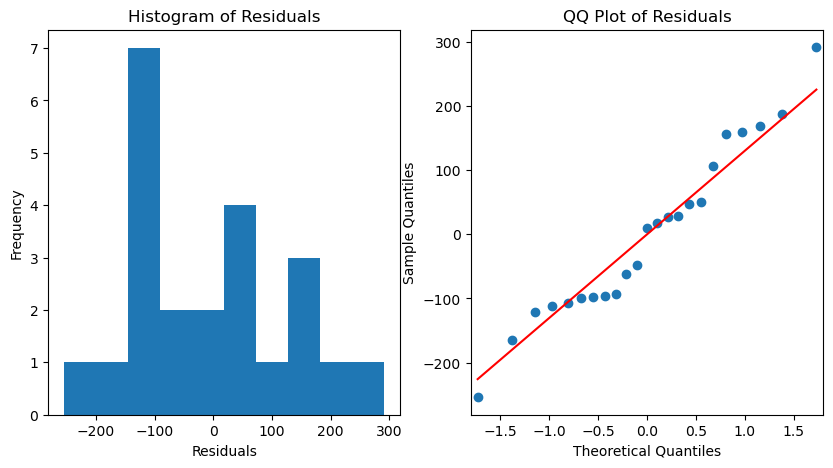

In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = {
    'Manufacturer': ['Sharp', 'Samsung', 'Samsung', 'Sony', 'Sharp', 'Samsung', 'Samsung', 'Sharp', 'Sharp', 'Sony', 'Sony', 'Samsung', 'Sharp', 'Sharp', 'Sharp', 'Samsung', 'Sharp', 'Samsung', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony'],
    'Screen (in inches)': [47, 32, 45, 38, 39, 52, 41, 38, 48, 51, 30, 43, 35, 43, 52, 43, 37, 47, 48, 38, 50, 34, 48],
    'Price ($)': [1102.00, 423.25, 1141.00, 754.75, 661.00, 1446.00, 995.25, 586.00, 1622.50, 1659.00, 481.50, 868.00, 609.00, 1062.00, 1604.00, 853.50, 530.25, 1159.00, 1609.00, 549.25, 1578.25, 427.50, 1470.00]
}

df = pd.DataFrame(data)

# Create the Sony and Sharp dummy variables
df['Sony'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sony' else 0)
df['Sharp'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sharp' else 0)

# Fit the multiple regression model
model = smf.ols('Q("Price ($)") ~ Q("Screen (in inches)") + Sony + Sharp', data=df).fit()

# Plot the residuals in histograms
residuals = model.resid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(residuals, bins=10)
axs[0].set_title('Histogram of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('QQ Plot of Residuals')
plt.show()

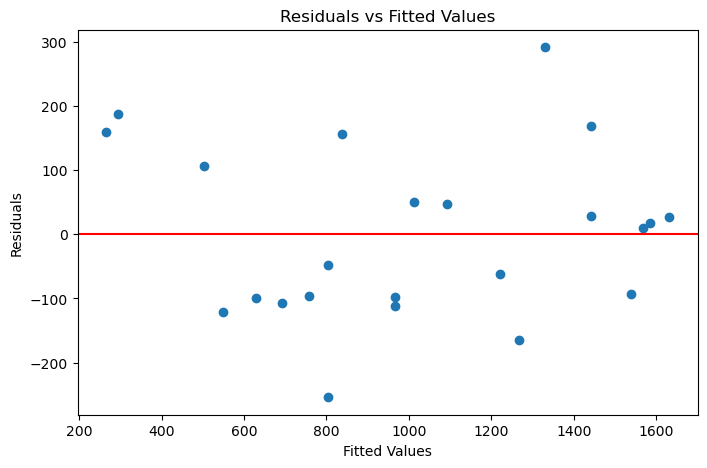

In [18]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Manufacturer': ['Sharp', 'Samsung', 'Samsung', 'Sony', 'Sharp', 'Samsung', 'Samsung', 'Sharp', 'Sharp', 'Sony', 'Sony', 'Samsung', 'Sharp', 'Sharp', 'Sharp', 'Samsung', 'Sharp', 'Samsung', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony'],
    'Screen (in inches)': [47, 32, 45, 38, 39, 52, 41, 38, 48, 51, 30, 43, 35, 43, 52, 43, 37, 47, 48, 38, 50, 34, 48],
    'Price ($)': [1102.00, 423.25, 1141.00, 754.75, 661.00, 1446.00, 995.25, 586.00, 1622.50, 1659.00, 481.50, 868.00, 609.00, 1062.00, 1604.00, 853.50, 530.25, 1159.00, 1609.00, 549.25, 1578.25, 427.50, 1470.00]
}

df = pd.DataFrame(data)

# Create the Sony and Sharp dummy variables
df['Sony'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sony' else 0)
df['Sharp'] = df['Manufacturer'].apply(lambda x: 1 if x == 'Sharp' else 0)

# Fit the multiple regression model
model = smf.ols('Q("Price ($)") ~ Q("Screen (in inches)") + Sony + Sharp', data=df).fit()

# Plot the residuals versus the fitted values
fitted_values = model.predict()
residuals = model.resid
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(fitted_values, residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted Values')
plt.show()

In [19]:
import pandas as pd
import numpy as np

data = {
    "Family": np.arange(1, 26),
    "Food": [4.07, 4.08, 5.76, 3.48, 4.20, 4.80, 4.32, 5.04, 6.12, 3.24, 4.80, 3.24, 5.48, 3.77, 6.60, 5.40, 6.00, 5.40, 3.36, 4.68, 4.32, 5.52, 4.56, 5.40, 7.80],
    "Income": [73.98, 54.90, 62.89, 52.02, 65.70, 53.64, 79.74, 68.58, 165.60, 64.80, 138.42, 125.82, 77.58, 134.04, 166.04, 141.30, 36.90, 56.88, 71.82, 69.48, 54.36, 87.66, 38.16, 43.74, 67.57],
    "Size": [5, 2, 4, 1, 2, 4, 3, 4, 5, 1, 3, 1, 7, 5, 5, 3, 5, 4, 1, 3, 2, 5, 3, 7, 2],
}

df = pd.DataFrame(data)
correlation_matrix = df.corr().round(3)
print(correlation_matrix)

        Family   Food  Income   Size
Family   1.000  0.364  -0.063  0.129
Food     0.364  1.000   0.155  0.494
Income  -0.063  0.155   1.000  0.121
Size     0.129  0.494   0.121  1.000


In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


data = {
    "Food": [4.07, 4.08, 5.76, 3.48, 4.20, 4.80, 4.32, 5.04, 6.12, 3.24, 4.80, 3.24, 5.48, 3.77, 6.60, 5.40, 6.00, 5.40, 3.36, 4.68, 4.32, 5.52, 4.56, 5.40, 7.80],
    "Income": [73.98, 54.90, 62.89, 52.02, 65.70, 53.64, 79.74, 68.58, 165.60, 64.80, 138.42, 125.82, 77.58, 134.04, 166.04, 141.30, 36.90, 56.88, 71.82, 69.48, 54.36, 87.66, 38.16, 43.74, 67.57],
    "Size": [5, 2, 4, 1, 2, 4, 3, 4, 5, 1, 3, 1, 7, 5, 5, 3, 5, 4, 1, 3, 2, 5, 3, 7, 2],
}

df = pd.DataFrame(data)

# Define the dependent variable (Food) and independent variables (Income, Size)
X = df[["Income", "Size"]]
y = df["Food"]

# Add a constant term to the independent variables (this represents the intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Import anova_lm from statsmodels
from statsmodels.stats.anova import anova_lm

# Create the ANOVA table
anova_results = anova_lm(model)

# Print the ANOVA table
print(anova_results)



                            OLS Regression Results                            
Dep. Variable:                   Food   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.732
Date:                Sat, 22 Apr 2023   Prob (F-statistic):             0.0402
Time:                        04:48:54   Log-Likelihood:                -34.129
No. Observations:                  25   AIC:                             74.26
Df Residuals:                      22   BIC:                             77.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5619      0.598      5.953      0.0

AttributeError: 'PandasData' object has no attribute 'design_info'

AttributeError: 'PandasData' object has no attribute 'design_info'

In [35]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Customer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Tip ($)': [8.0, 3.1, 1.0, 5.2, 5.0, 4.11, 0.5, 6.0, 5.0, 4.61, 5.11, 6.0, 4.0, 3.21, 1.03, 3.3, 3.5, 3.11, 5.4, 2.11, 5.5, 3.0, 1.11, 3.11, 3.0, 6.67, 5.6, 2.5, 9.11, 8.11],
    'Bill ($)': [48.83, 28.37, 10.79, 19.96, 28.76, 24.97, 6.38, 49.2, 43.4, 31.22, 33.01, 34.85, 34.05, 22.92, 4.79, 23.45, 22.3, 32.0, 50.16, 17.6, 44.33, 20.41, 19.39, 27.17, 21.14, 43.52, 27.98, 26.39, 56.67, 50.79],
    'Diners': [1, 5, 5, 3, 3, 2, 1, 4, 3, 4, 4, 3, 4, 2, 1, 2, 2, 2, 4, 3, 4, 2, 2, 3, 2, 4, 2, 2, 5, 5]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

          Customer   Tip ($)  Bill ($)    Diners
Customer  1.000000  0.135078  0.198769  0.029883
Tip ($)   0.135078  1.000000  0.884836  0.420271
Bill ($)  0.198769  0.884836  1.000000  0.512666
Diners    0.029883  0.420271  0.512666  1.000000


In [36]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df["Diners"]
y = df["Bill ($)"]

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Bill ($)   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     9.983
Date:                Sat, 22 Apr 2023   Prob (F-statistic):            0.00377
Time:                        05:32:14   Log-Likelihood:                -115.33
No. Observations:                  30   AIC:                             234.7
Df Residuals:                      28   BIC:                             237.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8022      5.601      2.464      0.0

                            OLS Regression Results                            
Dep. Variable:                Tip ($)   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     49.13
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.01e-09
Time:                        05:34:16   Log-Likelihood:                -42.037
No. Observations:                  30   AIC:                             90.07
Df Residuals:                      27   BIC:                             94.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0643      0.547      0.118      0.9

In [38]:
import statsmodels.api as sm

# Define the independent variable (X) and dependent variable (y)
X = df['Bill ($)']
y = df['Tip ($)']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the regression model and fit it to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tip ($)   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           8.63e-11
Time:                        05:36:52   Log-Likelihood:                -42.141
No. Observations:                  30   AIC:                             88.28
Df Residuals:                      28   BIC:                             91.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0552      0.466     -0.119      0.9

In [46]:
import pandas as pd
import statsmodels.api as sm

# create the data frame
data = pd.DataFrame({
    'loan': [85613, 113255, 110315, 91935, 97600, 104400, 113800, 116400, 100000, 92800, 105200, 105900, 94700, 105600, 104100, 85700, 113600, 119400, 90600, 104500],
    'monthly_payments': [1003.10, 929.31, 749.28, 726.17, 831.85, 983.27, 1075.54, 1087.16, 900.01, 683.11, 915.24, 905.67, 810.70, 891.33, 864.38, 1074.73, 871.61, 1021.23, 836.46, 1056.37],
    'payments_made': [1, 36, 7, 8, 21, 18, 20, 35, 33, 36, 34, 38, 25, 20, 7, 30, 24, 58, 3, 22],
    'auction_price': [28525, 40575, 45250, 16600, 40700, 63100, 72600, 72300, 58100, 37100, 52600, 51900, 43200, 52600, 42700, 22200, 77000, 69000, 35600, 63000]
})

# add the interaction term
data['loan_payments_interaction'] = data['loan'] * data['payments_made']

# fit the linear regression model with the interaction term
X = sm.add_constant(data[['loan', 'monthly_payments', 'payments_made', 'loan_payments_interaction']])
y = data['auction_price']
model = sm.OLS(y, X).fit()

# print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          auction_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     9.819
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           0.000416
Time:                        06:03:54   Log-Likelihood:                -209.90
No. Observations:                  20   AIC:                             429.8
Df Residuals:                      15   BIC:                             434.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [47]:
rss_full = ((y - model.predict(X)) ** 2).sum()

# fit the reduced model without the interaction term
X_reduced = sm.add_constant(data[['loan', 'monthly_payments', 'payments_made']])
model_reduced = sm.OLS(y, X_reduced).fit()

# extract the residual sum of squares for the reduced model
rss_reduced = ((y - model_reduced.predict(X_reduced)) ** 2).sum()

# compute the F-statistic and p-value for the interaction term
nobs = len(data)
df_diff = 1
df_full = nobs - (X.shape[1] - 1)
f_stat = ((rss_reduced - rss_full) / df_diff) / (rss_full / df_full)
p_value = 1 - sm.stats.distributions.f.cdf(f_stat, df_diff, df_full)

# print the results
print('F-statistic: {:.3f}'.format(f_stat))
print('p-value: {:.3f}'.format(p_value))

AttributeError: module 'statsmodels.stats.api' has no attribute 'distributions'